# PRÀCTICA 2: ANÀLISI DEL DATASET VINS 

### Autors: Josep Ingla i Joaquim Quadrada
### Data: 12/01/2023

## 1. Descripció del dataset

En aquesta pràctica farem un estudi del dataset vins.csv, provinent de la pràctica 1 dels mateixos autors. El dataset és el resultat de fer webscrapping a la web www.vinissimus.com obtenint certs atributs per cada vi llistat en les categories de vi negre, vi blanc i vi rosat.

Procedirem primer de tot a carregar el dataset a un DataFrame pandas i a observar-ne les primeres línies.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('vins.csv')
data.head()

,type,name,year,cellar,region,country,varieties,eco,rating,stars,opinions,likes,parker,penin,suckling,price,old_price,offer
0,Vinos rosados y rosé,Muga Rosado,2021,Bodegas Muga,Rioja,España,Garnacha / Viura / Tempranillo,NaN,4.60465,5,43,34,90,-1,-1,"8,95 €",NaN,False
1,Vinos rosados y rosé,Chivite Las Fincas Rosado,2021,Chivite,3 Riberas,España,Garnacha / Tempranillo,NaN,4.20408,5,49,28,-1,-1,-1,"11,50 €",NaN,False
2,Vinos rosados y rosé,Viña Real Rosado,2021,Viña Real,Rioja,España,Viura / Tempranillo,NaN,4.14286,5,7,9,91,-1,-1,"6,90 €",NaN,False
3,Vinos rosados y rosé,Naranjas Azules,2021,Soto y Manrique,Cebreros,España,Garnacha,NaN,3.64706,5,17,18,-1,-1,-1,"9,50 €",NaN,False
4,Vinos rosados y rosé,Can Sumoi La Rosa,2021,Can Sumoi,Penedès,España,Sumoll / Parellada / Xarel·lo,ECO,4.00000,5,17,6,-1,-1,-1,"11,85 €",NaN,False


In [2]:
print(data.dtypes)

type          object
name          object
year           int64
cellar        object
region        object
country       object
varieties     object
eco           object
rating       float64
stars          int64
opinions       int64
likes          int64
parker         int64
penin          int64
suckling       int64
price         object
old_price     object
offer           bool
dtype: object


Observem que el dataset està compost dels següents camps i tipus de dades (cal notar que els Strings es carreguen com a objectes al fer el pas de csv a pandas)

- 'type': el tipus de vi que és (negre, rosat, blanc) - object (String)
- 'name': el nom del vi - object (String)
- 'year': l'any de la varema - enter
- 'cellar': nom del productor del vi - object (String)
- 'region': regió de producció - object (String)
- 'country': país de producció - object (String)
- 'varieties': varietats de raïm utilitzades - object (String)
- 'eco': etiqueta de vi ecològic - object (String)
- 'rating': la valoració dels usuaris de vinissimus - float
- 'stars': les estrelles de valoració dels usuaris de vinissius - enter
- 'opinions': el nombre d'opinions dels usuaris de vinissimus - enter
- 'likes': el nombre de likes que han donat els usuaris de vinissimus - enter
- 'parker': la puntuació del vi en la guia Parker - enter
- 'penin': la puntuació del vi en la guia Peñín - enter
- 'suckling': la puntuació del vi en la guia Suckling - enter
- 'price': el preu del vi a la web de vinissimus - object (String)
- 'old_price': el preu antic del vi si actualment està en oferta - object (String)
- 'offer': ens indica si el vi està en oferta o no - booleà

El que es pretén en aquesta pràctica és veure si podem explicar el preu dels vins utilitzant els altres atributs, continus i discrets, descrits en el dataset. En particular, volem saber si els vins millor puntuats són els vins més cars, si els vins blancs son més cars que els rosats o els negres, si els vins d'algun país son més cars o barats que la resta i si l'anyada dels vins n'afecta el preu.

## Integració i selecció

El primer que farem és analitzar si hi ha valors duplicats i, en cas que n'hi hagi, els treurem.

In [3]:
#%% Vins duplicats
#Mirem si hi ha noms duplicats:
print("Vins sense el camp 'name': {}".format(np.sum(data['name'].isna())))
print('Nombre de files duplicades {}'.format(np.sum(data.duplicated())))
# Seleccionem la columna name
name_column = data['name']
# Comptem el nombre d'ocurrències de cada nom
value_counts = name_column.value_counts()
# Seleccionem els valors amb el count major que 1
duplicated_values = value_counts[value_counts > 1]
# Imprimim els resultats
print(duplicated_values)

Vins sense el camp 'name': 0
Nombre de files duplicades 28
Casa de Si Florecita Clarete Tinajas          2
Reale Tramonti Rosato Getis                   2
Fragantia Nº 6 Rosado                         2
Château Puech-Haut Tête de Bélier Rosé        2
Cantine Russo Etna Rosato Piano dei Daini     2
Domaine des Terrisses Gaillac Rosé            2
Chiaromonte Pinot Nero Rosato Kimìa           2
Masciarelli Colline Teatine Rosato            2
Terre di Talamo Rosé Piano Piano              2
Giacometti Patrimonio Rosé Cru des Agriate    2
Giusti Le Rose di Settembre                   2
Rocca delle Macìe Rosato Campo Maccione       2
Cara Nord Rosat Trepat                        2
Alfredo Maestro Amanda                        2
Maculan Costadolio                            2
Palmento Costanzo Etna Rosato Mofete          2
Saint M Rosé                                  2
Librandi Cirò Rosato                          2
Château d'Esclans Les Clans                   2
Marina Palusci Cerasuolo Senz

In [4]:
# Borrem els duplicats
data = data.drop_duplicates(subset='name')

A continuació ens preguntarem si efectivament totes les columnes ens poden ser útils. A priori, sembla que la columna 'name's'hauria d'analitzar:

In [5]:
print(data['name'].value_counts().value_counts())
data = data.drop(['name'], axis=1)

1    1412
Name: name, dtype: int64


Veiem que la columna 'name' conté valors únics, no hi ha cap nom repetit. Per tant, no ens pot portar informació per l'estudi que volem realitzar i suprimim la columna 'name'.

Centrem-nos ara als atributs de preu. Com podem veure, tenim la columna 'price' amb el preu actual, la columna 'old_price' amb el preu abans de l'oferta (si en té) i la columna 'offer' que ens diu si el vi està en oferta. Pensem que la columna 'old_price'  no és útil tenint ja la columna 'price' que ens diu el preu del vi i la columna 'offer' que ens diu si està en oferta o no. Per tant, l'eliminem:

In [6]:
#%% eliminem la columna 'old_price'
data.drop(columns=['old_price'], inplace=True)

A continuació mirem què passa amb la columna 'stars'. Aquesta hauria de tenir fins a cinc valors diferents (de 1 a 5 estrelles):

In [7]:
print(data['stars'].value_counts())
data.drop(columns=['stars'], inplace=True)

5    1412
Name: stars, dtype: int64


Veiem que la columna stars només té el valor 5, segurament per algun problema a l'hora de crear el dataset. Per tant, no ens és útil i l'esborrem.

A continuació mirem les columnes de puntuació en webs especialitzades (Parker, Peñín i Suckling). Primer de tot mirem quin percentatge de vins en cada columna no tenen puntuació web:

In [8]:
no_parker = (data['parker'] == -1).sum()/len(data)
no_penin = (data['penin'] == -1).sum()/len(data)
no_suckling = (data['suckling'] == -1).sum()/len(data)
print('% Vins sense puntuació Parker: {:2f}, Peñín: {:2f} i Suckling {:2f}'.format(no_parker,no_penin,no_suckling))

% Vins sense puntuació Parker: 0.887394, Peñín: 0.968130 i Suckling 0.946884


Observem que la gran majoria de vins no tenen puntuació de webs especialitzades. El que farem és agrupar les tres columnes 'parker', 'penin' i 'suckling' en una sola. Sabem que la majoria de puntuacions són sempre superiors a 90 i que no varien gaire entre webs especialitzades. Per tant agafarem la mitjana de cada columna (sense tenir en compte els valors -1) i un cop la tinguem omplirem de 0 aquells vins que no tinguin cap puntuació web.

In [9]:
#%% Per analitzar si tenen puntuació, agruparem els valors de 'Parker','Penin' i 'Susckling' en un sol valor
# Abans haurem de convertir els -1 en 0, i tindrem en compte la mitja dels valors no 0
data['reviews'] = data[['parker', 'penin', 'suckling']].where(data[['parker', 'penin', 'suckling']] != -1).mean(axis=1)
data['reviews'] = data['reviews'].fillna(0)
data.drop(columns=['parker', 'penin', 'suckling'], inplace=True)
no_reviews = (data['reviews'] == 0).sum()/len(data)
print('% Vins sense review: {:2f}'.format(no_reviews))

% Vins sense review: 0.839943


Veiem que, amb la conversió, el percentatge de vins sense valoració externa és del 84%, significativament més baix que el percentatge de valors de la més completa de les fonts (Peñín).

# Neteja de les dades

Un cop hem seleccionat les columnes que creim necessàries i hem integrat algunes columnes com les de les webs especialitzades, podem mirar la quantitat de nuls que tenim al dataset:

In [10]:
# Agafem el total de NaN per cada columna
null_values_count = data.isnull().sum()
# Mostrem el tipus de dada i el total de NaN per cada columna
for column in data.columns:
    print(f"Column '{column}' has type {data[column].dtypes} and {null_values_count[column]} NaN values")

Column 'type' has type object and 0 NaN values
Column 'year' has type int64 and 0 NaN values
Column 'cellar' has type object and 0 NaN values
Column 'region' has type object and 0 NaN values
Column 'country' has type object and 0 NaN values
Column 'varieties' has type object and 4 NaN values
Column 'eco' has type object and 1196 NaN values
Column 'rating' has type float64 and 0 NaN values
Column 'opinions' has type int64 and 0 NaN values
Column 'likes' has type int64 and 0 NaN values
Column 'price' has type object and 0 NaN values
Column 'offer' has type bool and 0 NaN values
Column 'reviews' has type float64 and 0 NaN values


Observem que la columna 'eco' té NaN. Com que és una columan string convertirem el valor NaN a "":

In [11]:
data = data.fillna('')
# Comprovem de nou quants NaN tenim:
print("Ara hi ha:",data.isnull().sum().sum(),"NaN")

Ara hi ha: 0 NaN


A continuació hem de convertir l'atribut 'price' a numèric.

In [12]:
#%% Convertim la columna price (String) a float
# Treiem el valor " €"
data['price'] = data['price'].replace(' €', '', regex=True)
# Convertim a float
data['price'] = data['price'].replace(',', '.', regex=True).astype(float)

El camp varieties té el format: Tempranillo / Graciano / Mazuelo, per tant, ens interessa separar cada varietat de vi en un element d'una llista d'strings i ordenar-la per poder categoritzar-la (de manera que podem dir que un vi tempranillo / garnatxa està composat de les mateixes varietats de raïm que un garnatxa / tempranillo). També extraurem una sèrie de pandas amb totes les varietts i el nombre de vegades que apareixen per a futurs anàlisis.

In [13]:
data['varieties'] = data.varieties.str.split(pat=' / ')
data['varieties'] = data['varieties'].apply(sorted)
data['varieties'].head()

0    [Garnacha, Tempranillo, Viura]
1           [Garnacha, Tempranillo]
2              [Tempranillo, Viura]
3                        [Garnacha]
4     [Parellada, Sumoll, Xarel·lo]
Name: varieties, dtype: object

In [14]:
# Extraiem una serie de pandas amb totes les varietats i el nombre de vegades que apareixen
varietats = data['varieties'].explode().value_counts()
print(varietats)

Tempranillo             284
Garnacha                259
Syrah                   151
Cabernet sauvignon      126
Merlot                  118
                       ... 
Lambrusco Montericco      1
Lambrusco Maestri         1
Marselan                  1
Freisa                    1
Tintilla                  1
Name: varieties, Length: 215, dtype: int64


# Anàlisi de dades i representació dels resultats

Donem un cop d'ull a com tenim el dataset un cop treballat en els apartats anteriors:

In [15]:
data.head()

,type,year,cellar,region,country,varieties,eco,rating,opinions,likes,price,offer,reviews
0,Vinos rosados y rosé,2021,Bodegas Muga,Rioja,España,"[Garnacha, Tempranillo, Viura]",,4.60465,43,34,8.95,False,90.0
1,Vinos rosados y rosé,2021,Chivite,3 Riberas,España,"[Garnacha, Tempranillo]",,4.20408,49,28,11.50,False,0.0
2,Vinos rosados y rosé,2021,Viña Real,Rioja,España,"[Tempranillo, Viura]",,4.14286,7,9,6.90,False,91.0
3,Vinos rosados y rosé,2021,Soto y Manrique,Cebreros,España,[Garnacha],,3.64706,17,18,9.50,False,0.0
4,Vinos rosados y rosé,2021,Can Sumoi,Penedès,España,"[Parellada, Sumoll, Xarel·lo]",ECO,4.00000,17,6,11.85,False,0.0


Començarem per representar les variables numèriques per entendre'n la distribució:

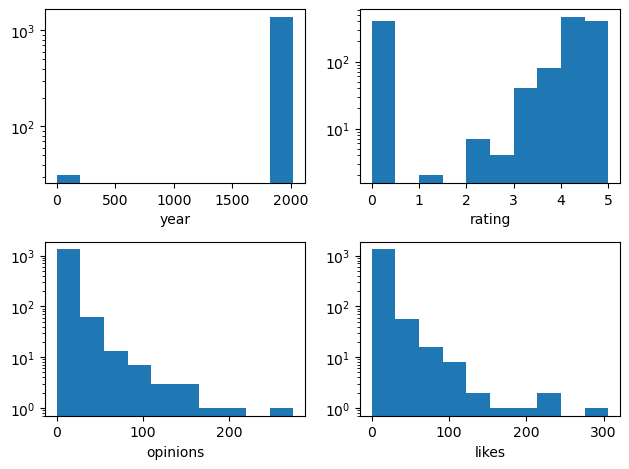

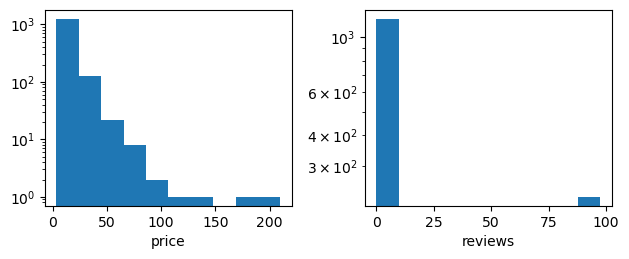

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
num_data = data.select_dtypes(include='number')

i = 1
for col in num_data:
    plt.subplot(2,2,i)
    plt.hist(data[col], bins=10)
    plt.yscale('log')
    plt.xlabel(col)
    if i < 4:
        i += 1
    else:
        i = 1
        plt.tight_layout()
        plt.show()
plt.tight_layout()

Hi ha uns quants aspectes que criden l'atenció respecte aquests gràfics:
* Els camps likes, opinions i price segueixen una distribució que decreix en augmentar el valor però que presenta alguns outliers que prenen valors molt alts. Es tracta de, per una banda, els vins més populars i, per l'altra, dels vins més cars. Tot i ser valors extrems, són valors correctes que creiem que no s'han de suprimir ja que poden aportar molta informació.
* El camp rating té un pic a 0, que és un valor centinella. De fet es tracta dels vins que no han estat valorats pels usuaris de vinissimus.com i que per tant encara no se'n té informació de gustos (perque no s'han venut, perque no són prou bons, no se sap ben bé perquè). Es tracta d'un camp particular ja que els vins amb més reputació tenen una valoració per part dels usuaris i, per tant tenen un rating diferent de zero a la llista. En aquest context, utilitzar valors extrets aleatòriament dels ratings dels altres vins per canviar els valors 0 no seria acurat i per tant mantenim els valors tal com estan. 
* El camp reviews presenta un biaix molt gran cap a 0, ja que hi ha molts més vins no valorats per webs especialitzades que de valorats. Aquest camp el deixem així per detectar si la valoració d'un vi pot afectar al preu d'aquest.
* El camp year es veu totalment compromès per els valors centinella, que prenen el valor -1 i no permeten visualitzar correctament aquest camp. Tenint en compte que l'any de berema d'un vi és una dada coneguda per a tots els vins menys per aquells de més baixa qualitat, podem assumir que els vins que no tenen anyada són vins de la verema anterior i, per tant, els posarem tots a 2022 (generalment els vins de baixa qualitat no tenen anys de criança en bota i, per tant, assumim que son vins joves).

In [17]:
# Assignem anyada 2022 als anys que no tenen anyada
year_not_empty = data.loc[data.year != -1,['year']]
# Com que els vins sense any son més dolents que la mitjana, assumim que son tots de l'any 2022.
data.loc[data.year == -1,['year']] = 2022

Text(0.5, 0, 'year')

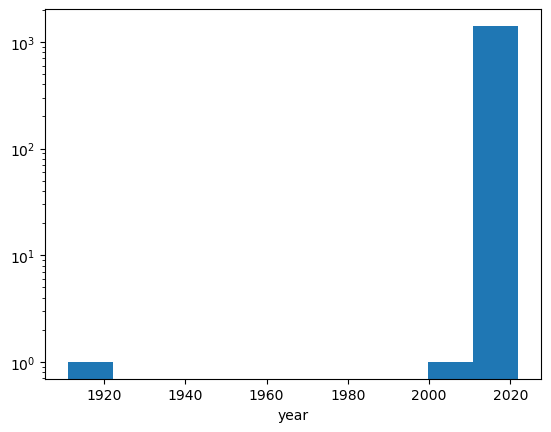

In [18]:
plt.hist(data.year)
plt.yscale('log')
plt.xlabel('year')

Veiem que hi ha un vi anterior al 1920 mentres que la resta son d'entre 2000 i 2020, indicant que segurament es tracta d'un valor incorrecte. Creiem que es van equivocar al entrar 1920 per 2020. El canviarem per 2020.
Finalment, veiem com es troben distribuïts els vins per any. La distribució demostra que hi ha una gran quantitat de vins entre el 2018 i el 2020 i una minoria de vins anteriors al 2014:

Text(0.5, 0, 'year')

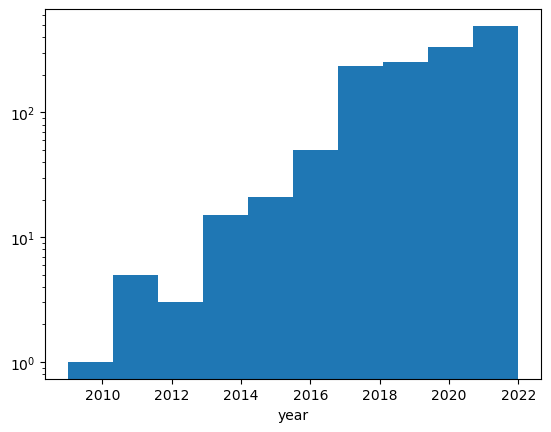

In [19]:
data.loc[data.year<1930, ['year']] = 2020
plt.hist(data.year)
plt.yscale('log')
plt.xlabel('year')

A continuació crearem un diagrama de parella de totes les columnes numèriques del dataset. Els diagrames de parella mostren la relació entre totes les parelles de variables numèriques en un conjunt de dades en una sola imatge i permeten visualitzar si hi ha correlacions entre elles. 

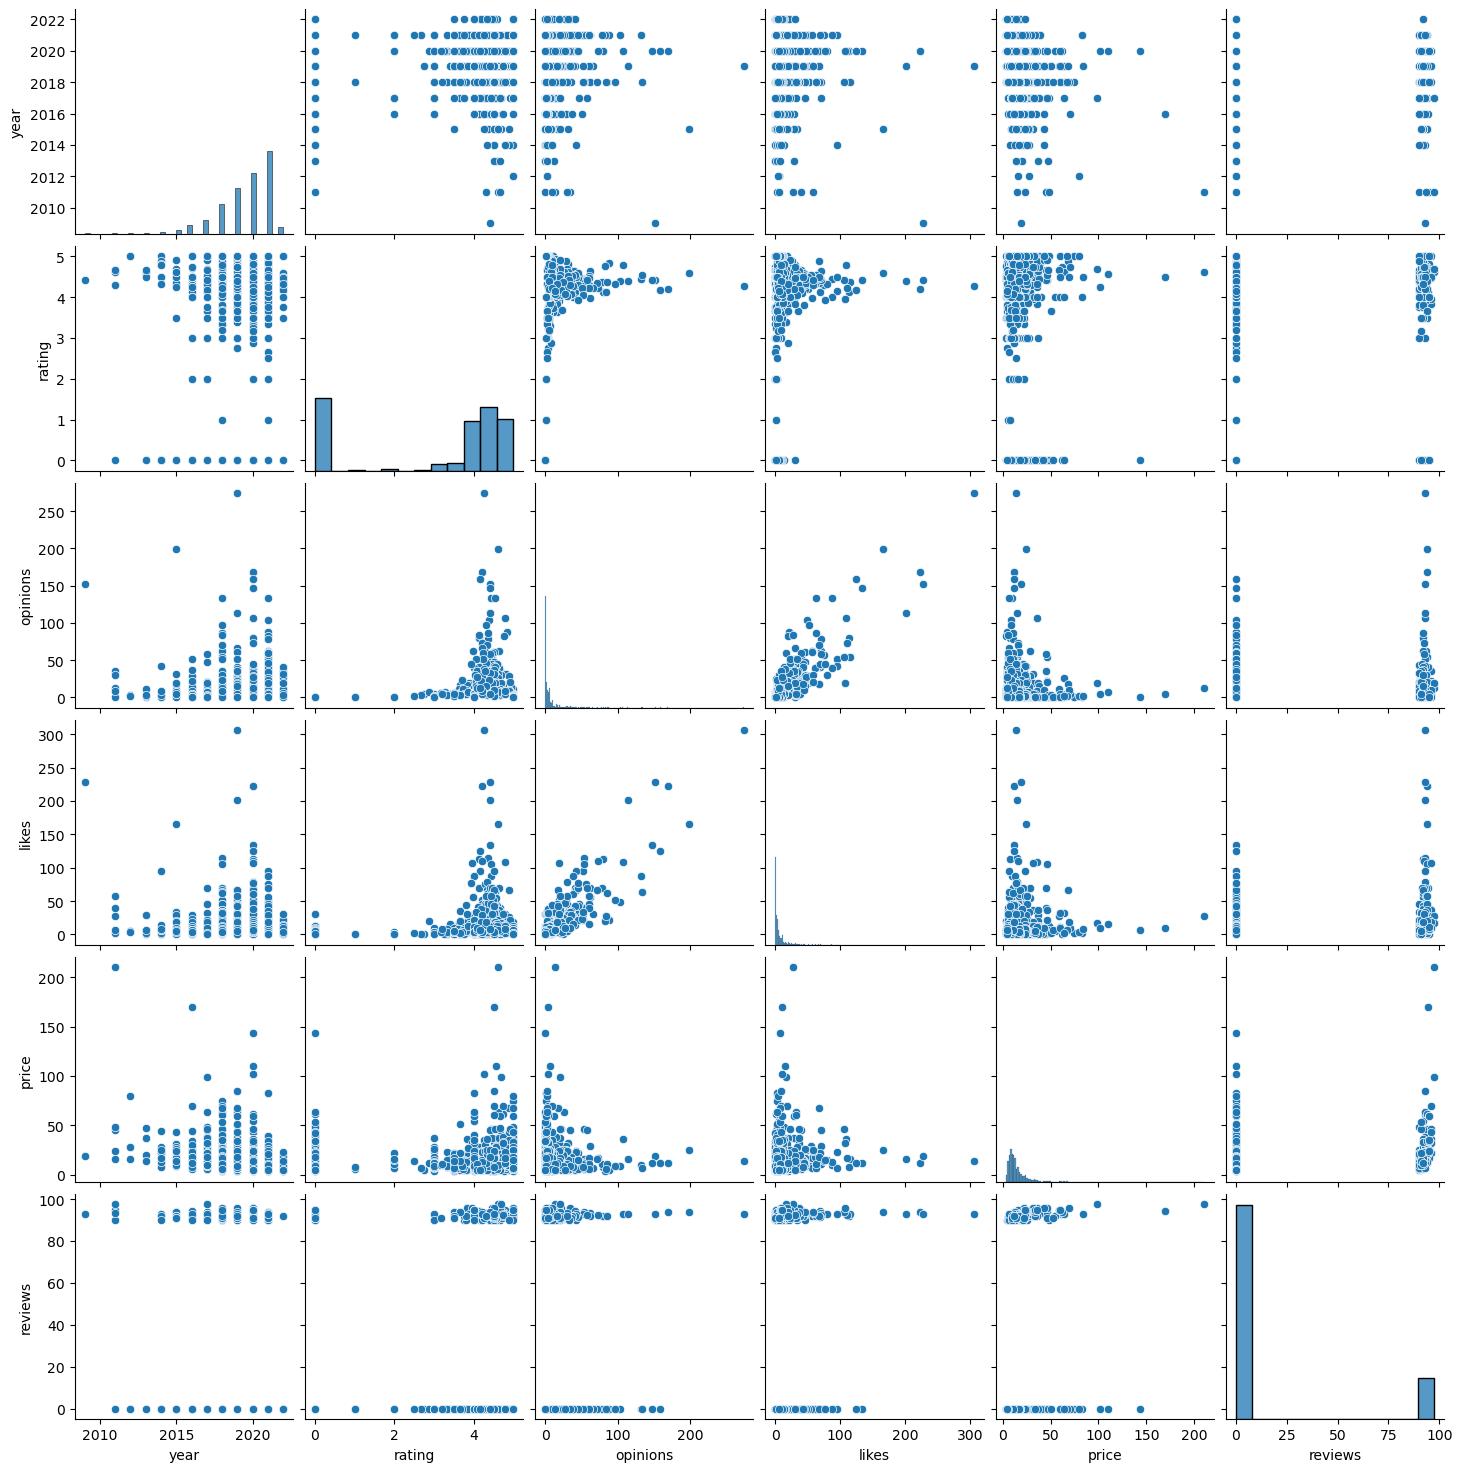

In [20]:
num_data = data.select_dtypes(include='number')
sns.pairplot(num_data)
plt.show()

Dels gràfics mostrats podem començar a deduir algunes relacion. Així, per exemple, veiem una relació força lineal entre opinions i likes, cosa que sembla dir-nos que la gent que opina dels vins també els fa like i que, per tant, la gent té tendència a valorar només els vins que els han agradat. Això queda reforçat observant els gràfics de preu vs. likes i opinions, on obtenim gràfiques similars i, per tant, també en podem deduir que qui fa like generalment opina.

Observem que les reviews de revistes especialitzades abarquen un ventall de preus de vins molt elevat, ja que les notes abarquen des de vins molt barats al vi més car de la web (per sobre de 200€ l'ampolla). Això ho podem veure al gràfic de price vs. reviews. Això sembla indicar que la puntuació de les webs especialitzades probablement no influeix en el preu del vi.

També és interessant analitzar la influència de l'anyada de berema amb el preu. Observem que hi ha dispersió i que, tot i tenir una certa tendència a l'encariment dels vins més antics, aquesta no és del tot clara per als preus mitjans. Si ens fixem només amb els preus mínims, veiem que aquests sí que augmenten en incrementar l'antiguitat dels vins. 

Per quantificar les relacions entre variables calculem la matriu de correlació que ens mostrarà la relació lineal ente les variables. Recordem que el valor de la correlació estarà sempre entre -1 i 1, on -1 indica una correlació negativa perfecta, 0 indica que no hi ha cap relació i 1 indica una correlació positiva perfecta.

In [21]:
num_data.corr()

,year,rating,opinions,likes,price,reviews
year,1.000000,0.105586,-0.034841,-0.091071,-0.290354,-0.148716
rating,0.105586,1.000000,0.267566,0.230418,0.026560,0.092603
opinions,-0.034841,0.267566,1.000000,0.865976,-0.008364,0.200722
likes,-0.091071,0.230418,0.865976,1.000000,0.104346,0.314219
price,-0.290354,0.026560,-0.008364,0.104346,1.000000,0.243686
reviews,-0.148716,0.092603,0.200722,0.314219,0.243686,1.000000


Realitzat l’anàlisi numèric i gràfic de correlacions, concloem que les dependències més interessants a analitzar entre variables numèriques son entre prices i reviews (tot i que la correlació no és gaire forta, al voltant de 0.24), entre prices i year (tenin una correlació negativa de -0.29), entre likes i reviews (amb una correlació una mica millor de 0.31) i finalment la correlació més clara, entre likes i opinions, amb un valor de 0.87.

Altres preguntes interessants son si el tipus de vi, la regió o les varietats de raïm que conté influencien els ratings dels usuaris de la web i els reviews per part d’experts. 

Ara ens disposem a analitzar la normalitat de les variables numèriques:

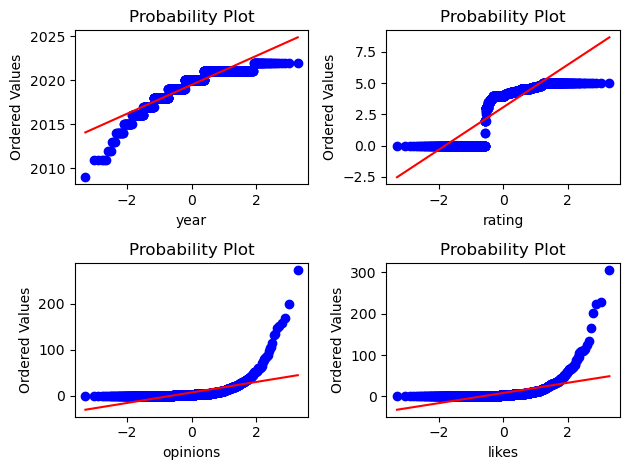

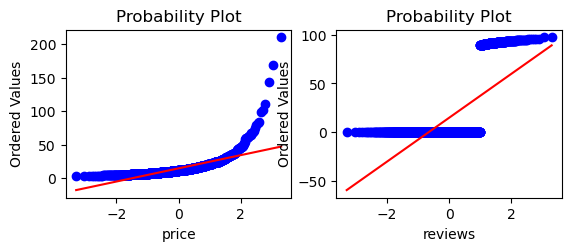

array([2.43054633e-090, 9.81660267e-244, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 3.43978375e-095])

In [22]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats.mstats import normaltest
i = 1
for col in num_data:
    fig = plt.subplot(2,2,i)
    prob = stats.probplot(data[col], dist=stats.norm, plot=fig)
    plt.xlabel(col)
    if i < 4:
        i += 1
    else:
        i = 1
        plt.tight_layout()
        plt.show()
plt.show()
norm = normaltest(num_data)
norm.pvalue

Veiem que tots els p-valors resultants del normaltest son menors de 5E-2, el valor màxim permès per considerar que es tracta d'una distribució normal. Els gràfics de quartils confirmen el resultat numèric amb desviacions molt clares de les dades respecte la diagonal.

Intentem per tant utilitzar una transformació de Box-Cox per convertir les dades en normals:

C:\Programs\Anaconda3\envs\uoc20221pec4\lib\site-packages\scipy\stats\_morestats.py:922: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
C:\Programs\Anaconda3\envs\uoc20221pec4\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Programs\Anaconda3\envs\uoc20221pec4\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


normaltest ha fallat per a year
El p-valor per a la variable rating modificada és: 0.04328067166501361
El p-valor per a la variable opinions modificada és: 3.7665857138067625e-60
El p-valor per a la variable likes modificada és: 0.02267724265786754


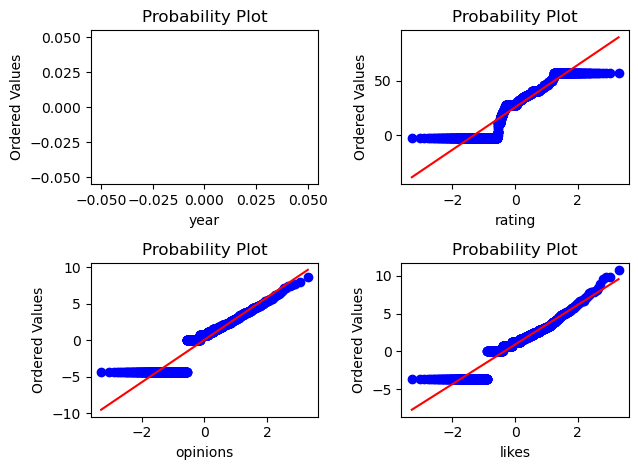

El p-valor per a la variable price modificada és: 0.7952561991192981
El p-valor per a la variable reviews modificada és: 4.899824977989266e-95


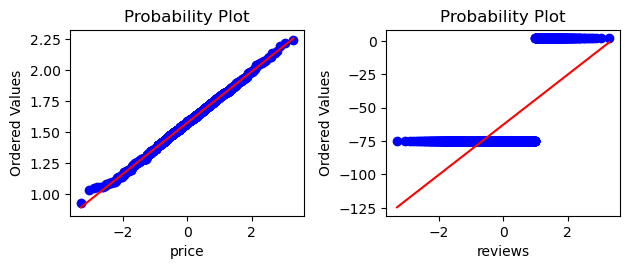

In [23]:
i = 1
for col in num_data:
    
    xt, _ = stats.boxcox(num_data[col].replace(0, 1E-3).abs())
    data[col+'_norm'] = xt
    # La transformació de boxcox no funciona amb zeros o números negatius
    
    if col == 'rating':
        xt, _ = stats.boxcox(num_data.loc[num_data.rating != 0, col])
        data.loc[num_data.rating != 0, 'rating_norm'] = xt
    try:
        norm = normaltest(xt)
        print('El p-valor per a la variable {} modificada és: {}'.format(col,norm.pvalue))
    except:
        print('normaltest ha fallat per a {}'.format(col))
    fig = plt.subplot(2,2,i)
    prob = stats.probplot(data[col+'_norm'], dist=stats.norm, plot=fig)
    plt.xlabel(col)
    if i < 4:
        i += 1
    else:
        i = 1
        plt.tight_layout()
        plt.show()
plt.tight_layout()

Veiem que només el camp price es pot considerar normal després de la transformació de Box-Cox.
Per tant el preu és l'única variable contínua que es pot utilitzar per a models paramètrics.

$Homoscedasticitat$

Les variables categòriques d'interes son: 'type', 'year', 'cellar', 'region', 'country', 'varieties',
'eco' i 'offer'.
Comprovem si la variança del preu normalitzat depen d'aquestes variables:

In [24]:
def split_by_field(field, var_cont='price_norm'):
    field_vals = data[field].unique()
    var_cont_field = []
    for t in field_vals:
        var_cont_field.append(data.loc[data[field] == t, var_cont])
    print('El test de Levene per al camp {} dona: {}'.format(field, stats.levene(*var_cont_field)))
    return var_cont_field

price_norm_vs_type = split_by_field('type')
price_norm_vs_country = split_by_field('country')
price_norm_vs_eco = split_by_field('eco')
price_norm_vs_offer = split_by_field('offer')
print('offer té {} positius, un {}% del total'.format(len(data.loc[data.offer == True]), 100*len(data.loc[data.offer == True])/len(data)))

El test de Levene per al camp type dona: LeveneResult(statistic=4.4116769686754616, pvalue=0.012302889826959394)
El test de Levene per al camp country dona: LeveneResult(statistic=6.521999568175784, pvalue=6.322135796459743e-13)
El test de Levene per al camp eco dona: LeveneResult(statistic=20.844321610733342, pvalue=5.415476280954509e-06)
El test de Levene per al camp offer dona: LeveneResult(statistic=0.16783574671713897, pvalue=0.6821046837449849)
offer té 99 positius, un 7.0113314447592066% del total


El p-valor és major de 0.05 només en el cas de la variable 'offer' indicant que els únics anàlisis parametrics que es pot realitzar entre variables diferents son una regressió logística entre 'offer' i 'price_norm' i un test T de Student per comprovar si hi ha una diferència significativa de preus entre els vins amb i sense oferta.

$Models$

Apliquem un algoritme de regressió logística amb validació creuada per obtenir-ne la precisió per explicar la variable offer utilitzant price_norm. 

Com que es tracta d'un conjunt de dades força esbiaixat (només un 7% dels vins està d'oferta), utilitzem la mètrica ROC_AUC per avaluar la bondat del model i calculem també la matriu de confusió:

In [25]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
clf = LogisticRegressionCV(random_state=0,scoring='roc_auc')
clf.fit(data.price_norm.to_numpy().reshape(-1, 1), data.offer.to_numpy())
scores = clf.scores_
y_pred = clf.predict(data.price_norm.to_numpy().reshape(-1, 1))
print('Matriu de confusió regressió logística:')
print(confusion_matrix(data.offer.to_numpy(), y_pred))
for i, s in enumerate(scores[True]):
    print('Iteració {} ROC_AUC mitjà: {}'.format(i, np.mean(s)))
# Apliquem el test T de Student per a comprovar si hi ha una diferència significativa entre els preus mitjans dels vins que
# estan d'oferta
Ttest = stats.ttest_ind(*price_norm_vs_offer)
print('El p-valor resultant del test T és {}'.format(Ttest.pvalue))
Ttest2 = stats.ttest_ind(*price_norm_vs_offer, alternative='greater')
print('El p-valor resultant del test T amb hipòtesi alternativa que els vins amb oferta son més barats és: {}'.format(Ttest2.pvalue))

Matriu de confusió regressió logística:
[[1313    0]
 [  99    0]]
Iteració 0 ROC_AUC mitjà: 0.667490494296578
Iteració 1 ROC_AUC mitjà: 0.6194866920152091
Iteració 2 ROC_AUC mitjà: 0.6367820692415449
Iteració 3 ROC_AUC mitjà: 0.6834923664122137
Iteració 4 ROC_AUC mitjà: 0.5239503816793893
El p-valor resultant del test T és 5.636850096357281e-05
El p-valor resultant del test T amb hipòtesi alternativa que els vins amb oferta son més barats és: 2.8184250481786405e-05


En la matriu de confusió veiem que la regressió logística prediu en qualsevol cas que el vi no està d'oferta. A més, la mètrica ROC_AUC pren valors entre 0.52 i 0.68, indicant que el model no és gaire millor que una predicció aleatòria [1] i, per tant és molt difícil millorar-lo. Això molt probablement es degui al fet que el conjunt de dades està molt esbiaixat i, com s'ha explicat anteriorment, només un 7% dels vins estan d'oferta.

El test T en canvi presenta un p-valor molt petit, indicant que podem descartar la hipòtesi nul.la d'igualtat entre els preus. A més, el test amb hipòtesi alternativa que els vins amb oferta son més barats dona un p-valor fins i tot major, indicant que els vins amb oferta son més barats que els que no en tenen (price_norm_vs_offer [0] es correspon al valor False del camp oferta). 

Aquest resultat es pot veure gràficament en el diagrama de caixes següent:

[1] https://en.wikipedia.org/wiki/Receiver_operating_characteristic

Mitjana de preus normalitzats sense oferta: 1.577905246236789 amb oferta 1.4914655548694142


([<matplotlib.axis.XTick at 0x1f7d90fc850>,
 [Text(1, 0, 'No offer'), Text(2, 0, 'Offer')])

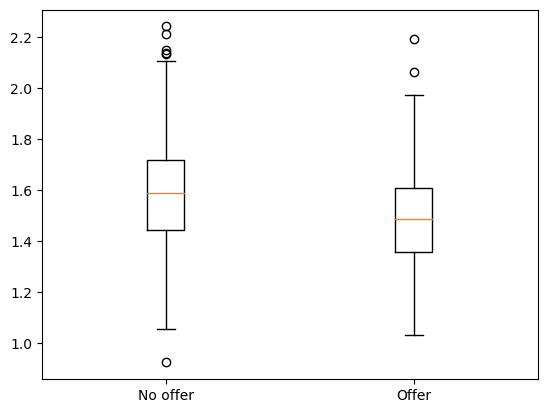

In [26]:
print('Mitjana de preus normalitzats sense oferta: {} amb oferta {}'.format(np.mean(price_norm_vs_offer[0]),
                                                                            np.mean(price_norm_vs_offer[1])))
box = plt.boxplot(price_norm_vs_offer)
plt.xticks([1,2], labels=['No offer','Offer'])

Utilitzant el contrast d'hipòtesis de Kruskal podem analitzar l'efecte de les altres variables categòriques sobre el preu:

In [27]:
price_norm_list = [price_norm_vs_type, price_norm_vs_eco]

In [28]:
for  p, name in zip(price_norm_list, ['type', 'eco']):
    #print(len(p))
    Ktest = stats.kruskal(*p)
    print('El p-valor resultant del test de Kruskal sobre la variable {} és {}'.format(name, Ktest.pvalue))

El p-valor resultant del test de Kruskal sobre la variable type és 5.6745782576480895e-09
El p-valor resultant del test de Kruskal sobre la variable eco és 0.14577195056490383


Veiem que la variable eco no té cap efecte significatiu en el preu i el fet que el vi tingui rating independent tampoc.
En canvi, el tipus de vi sí que sembla tenir un efecte en el preu. Ens interessa saber quin tipus de vi és el més car. Per això hem calculat les mitjanes de preu normalitzat: 

In [29]:
tipus_str = ['rosats', 'blancs', 'negres']
for s, t in zip(tipus_str, price_norm_vs_type):
    print('El preu mitjà normalitzat dels vins {} és {}'.format(s, t.mean()))

El preu mitjà normalitzat dels vins rosats és 1.522439038424012
El preu mitjà normalitzat dels vins blancs és 1.5800274721583756
El preu mitjà normalitzat dels vins negres és 1.610185512994388


Ara apliquem diferents tests de Kruskal per comprovar quines son les varietats que tenen una diferència significativa de preu entre elles:

In [30]:
Ktest = stats.kruskal(price_norm_vs_type[1], price_norm_vs_type[0])
print('El p-valor resultant del test de Kruskal comparant Vino blanco amb rosados y rosé és {}'.format(Ktest.pvalue))
Ktest = stats.kruskal(price_norm_vs_type[1], price_norm_vs_type[2])
print('El p-valor resultant del test de Kruskal comparant Vino blanco amb tinto és {}'.format(Ktest.pvalue))
Ktest = stats.kruskal(price_norm_vs_type[0], price_norm_vs_type[2])
print('El p-valor resultant del test de Kruskal comparant Vinos rosados y rosé amb tinto és {}'.format(Ktest.pvalue))

El p-valor resultant del test de Kruskal comparant Vino blanco amb rosados y rosé és 2.1925334028093445e-05
El p-valor resultant del test de Kruskal comparant Vino blanco amb tinto és 0.061310341170654196
El p-valor resultant del test de Kruskal comparant Vinos rosados y rosé amb tinto és 2.0842434130063903e-09


Concloem que la diferència entre els preus dels vins rosats i les altres dues categories (blancs i negres) és significativa, mentres que la diferència de preu entre vins blancs i negres no és significativa, ja que el p-valor és de 0.06. 
Les comparacions entre vi negre, vi blanc i rosat i les mitjanes obtingudes a la cel.la anterior ens indiquen que els vins negres son més cars que els altres dos junts i que els rosats son més barats. 

Per visualitzar aquests resultats és útil representar-los en un diagrama de caixes (notar que la variable a l'eix y és el preu normalitzat utilitzant la transformació de Box-Cox):

([<matplotlib.axis.XTick at 0x1f7da31ceb0>,
 [Text(1, 0, 'Rosats'), Text(2, 0, 'Blancs'), Text(3, 0, 'Negres')])

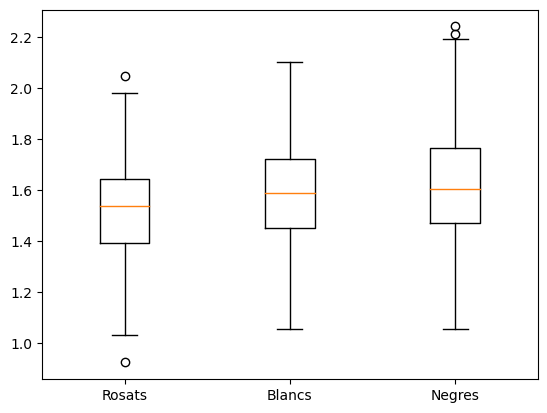

In [31]:
box = plt.boxplot(price_norm_vs_type)
plt.xticks([1,2,3], labels=['Rosats', 'Blancs', 'Negres'])

Ara analitzem l'efecte del la varietat de raïm en el preu. 
Primer cal veure si es compleix la condició d'homoscedasticitat:

In [32]:
varis = data['varieties'].explode()

print(varietats[:10])
for imax in range(2, 11):
    var_cont_field = []
    for v in varietats.keys()[:imax]:
        var_cont_field.append(data.loc[varis[varis==v].index, 'price_norm'])
    print('El test de Levene per {} varietats de vi  dona: {}'.format(imax, stats.levene(*var_cont_field)))


Tempranillo           284
Garnacha              259
Syrah                 151
Cabernet sauvignon    126
Merlot                118
Verdejo                69
Chardonnay             58
Garnacha blanca        53
Albariño               52
Macabeo                51
Name: varieties, dtype: int64
El test de Levene per 2 varietats de vi  dona: LeveneResult(statistic=5.050158610970269, pvalue=0.025025901735909482)
El test de Levene per 3 varietats de vi  dona: LeveneResult(statistic=6.325585982569307, pvalue=0.001895301765422073)
El test de Levene per 4 varietats de vi  dona: LeveneResult(statistic=4.4556780834617475, pvalue=0.00409368505113003)
El test de Levene per 5 varietats de vi  dona: LeveneResult(statistic=3.3049283791229227, pvalue=0.010607098496265198)
El test de Levene per 6 varietats de vi  dona: LeveneResult(statistic=4.217660391007895, pvalue=0.0008459037851420971)
El test de Levene per 7 varietats de vi  dona: LeveneResult(statistic=3.466231721406617, pvalue=0.002133589421624104)


Per mantenir un conjunt de dades balancejat però el més complert possible, prenem les 10 primeres varietats de vi, que es troben en més de 50 vins diferents. Veiem que no es compleix la condició d'homoscedasticitat (p-valor=0.023). Per tant apliquem el test de Kruskal a cada parell de classes de raïm per comprovar si hi ha diferències de preu.

In [33]:
var_cont_field = []
for v in varietats.keys()[:10]:
    var_cont_field.append(data.loc[varis[varis==v].index, 'price_norm'])
    
for i in range(10):
    for j in range(10):
        if i<j:
            Ttest = stats.kruskal(var_cont_field[i], var_cont_field[j])
            print('El p-valor resultant del test de Kruskal entre les varietats {} i {} és {}'.format(varietats.keys()[i], 
                                                                                                      varietats.keys()[j], 
                                                                                                      Ttest.pvalue))

El p-valor resultant del test de Kruskal entre les varietats Tempranillo i Garnacha és 0.5786729581899095
El p-valor resultant del test de Kruskal entre les varietats Tempranillo i Syrah és 0.045921169452605895
El p-valor resultant del test de Kruskal entre les varietats Tempranillo i Cabernet sauvignon és 0.3166527182486705
El p-valor resultant del test de Kruskal entre les varietats Tempranillo i Merlot és 0.738954065644488
El p-valor resultant del test de Kruskal entre les varietats Tempranillo i Verdejo és 0.000252921451544989
El p-valor resultant del test de Kruskal entre les varietats Tempranillo i Chardonnay és 0.867460600595713
El p-valor resultant del test de Kruskal entre les varietats Tempranillo i Garnacha blanca és 0.006420781181138418
El p-valor resultant del test de Kruskal entre les varietats Tempranillo i Albariño és 0.004188280315668872
El p-valor resultant del test de Kruskal entre les varietats Tempranillo i Macabeo és 0.02114837488300469
El p-valor resultant del te

Veiem que hi ha alguns emparellaments on els els p-valors son tots més petits de 0.05, cosa que indica que hi ha diferència significativa de preus entre aquestes classes de vins. I de fet, si observem amb deteniment, veiem que són sempre les comparatives de varietats per produir vins blancs versus varietats per produir vins negres. Per exemple, entre Tempranillo i Verdejo tenim un p-valor de 0.00025: Tempranillo és per a vins negres i Verdejo per a blancs. Es curiós veure que entre les varietats Verdejo i Chardonnay, les dues per a vins blancs, el p-valor és 0.0039. Per tant vol dir que entre aquestes dues varietats de raïm, tot i ser per produir vins blancs, sí que hi ha diferència de preu. Veiem també casos de diferència de preus en varietats per produir blanc: Garnacha blanca i Macabeo té un p-valor de 0.00032 o Albariño i Macabeo té 0.00013, segurament degut a que el Macabeu s'utilitza per fer caves i la Garnatxa blanca i l'Albarinyo per vins blancs, amb la seva conseqüent diferència de preu.

In [34]:
# Extraiem una serie de pandas amb tots els països i el nombre de vegades que apareixen
paisos = data['country'].explode().value_counts()
print(paisos[:10])

España            1069
Italia             169
Francia            114
Alemania            16
Argentina           14
Nueva Zelanda        7
Chile                6
Estados Unidos       6
Australia            3
Sudáfrica            2
Name: country, dtype: int64


In [35]:
varis = data['country'].explode()

#print(varietats[:3])
for imax in range(2, 5):
    pais_cont_field = []
    for v in paisos.keys()[:imax]:
        pais_cont_field.append(data.loc[varis[varis==v].index, 'price_norm'])
    print('El test de Levene per {} paisos  dona: {}'.format(imax, stats.levene(*pais_cont_field)))


El test de Levene per 2 paisos  dona: LeveneResult(statistic=56.00292497644931, pvalue=1.369362509839796e-13)
El test de Levene per 3 paisos  dona: LeveneResult(statistic=28.985211942330405, pvalue=4.729868041860905e-13)
El test de Levene per 4 paisos  dona: LeveneResult(statistic=22.23324615683005, pvalue=4.6726206657422815e-14)


Com que p-valor associat al test de Levene és sempre menor de 0.5, hem d'utilitzar la prova de Kruskal.

Per tenir un conjunt de dades balancejat comparem només els tres primers països: Espanya, Itàlia i França.

In [36]:
pais_cont_field = []
for v in paisos.keys()[:4]:
    pais_cont_field.append(data.loc[varis[varis==v].index, 'price'])
    
for i in range(4):
    for j in range(4):
        if i<j:
            Ttest = stats.kruskal(pais_cont_field[i], pais_cont_field[j])
            print('El p-valor resultant del test de Kruskal entre els països {} i {} és {}'.format(paisos.keys()[i], paisos.keys()[j], Ttest.pvalue))

El p-valor resultant del test de Kruskal entre els països España i Italia és 2.532966614039708e-10
El p-valor resultant del test de Kruskal entre els països España i Francia és 1.7021746460263442e-09
El p-valor resultant del test de Kruskal entre els països España i Alemania és 0.0012253757917382322
El p-valor resultant del test de Kruskal entre els països Italia i Francia és 0.2685784028845201
El p-valor resultant del test de Kruskal entre els països Italia i Alemania és 0.08817620589455503
El p-valor resultant del test de Kruskal entre els països Francia i Alemania és 0.46973637636169985


In [37]:
for s, t in zip( paisos.keys()[:4], pais_cont_field):
    print('La mitjana del preu normalitzat dels vins de {} és {}'.format(s, t.mean()))

La mitjana del preu normalitzat dels vins de España és 13.944293732460286
La mitjana del preu normalitzat dels vins de Italia és 14.788579881656789
La mitjana del preu normalitzat dels vins de Francia és 19.141929824561416
La mitjana del preu normalitzat dels vins de Alemania és 17.314999999999998


(0.0, 50.0)

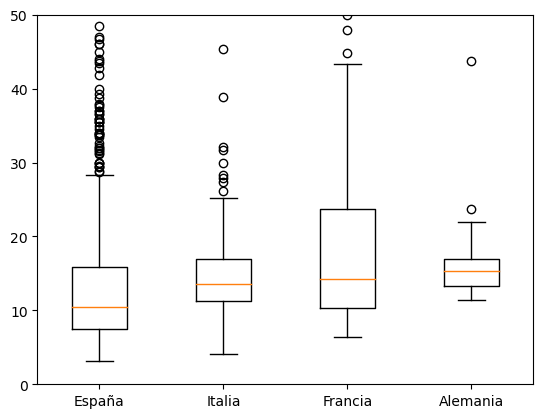

In [38]:
p = plt.boxplot(pais_cont_field)
t = plt.xticks([1,2,3,4], labels=paisos.keys()[:4])
plt.ylim([0, 50])

Utilitzant els tests de Kruskal, les mitjanes i el boxplot anterior estem en condicions d'interpretar els resultats: El primer resultat, que podem veure de forma numèrica (test de Levene) i gràfica (boxplot), és que la dispersió de preus és molt diferent depenent del país (no hi ha homoscedasticitat). Analitzant els resultats del test de Kruskal, veiem que els vins espanyols son els més barats amb diferències significatives de preu respecte els italians, francesos i alemanys. Entre els altres tres paisos no hi ha diferències significatives.

Finalment farem un estudi de regressió amb la variable 'price' com a variable objectiu, ja que considerem que és la més interessant,  utilitzant les variables contínues any, rating, opinions i reviews com a explicatives. Recordem que hem vist una forta correlació entre 'likes' i 'opinions'. Per construïr un model on les variables explicatives siguin el més independents possibles, treiem la variable 'opinions'.

Centrem-nos doncs en l'estudi de regressió amb la variable 'price': com que en un model lineal els residus han de seguir una distribució normal, apliquem el model a la variable 'price_norm' i apliquem la tranformació Box-Cox inversa per obtenir els preus reals predits.

In [39]:
from sklearn.linear_model import LinearRegression

# Select the columns to use as features
X = data[['year', 'rating', 'opinions', 'reviews']]
# No utilitzem el camp  'likes' perque es troba altament correlacionat amb el camp opinions (0.87 de correlació)
# Select the target column
y = data['price_norm']

# Create the model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

LinearRegression()

R2=0.16798756298266626


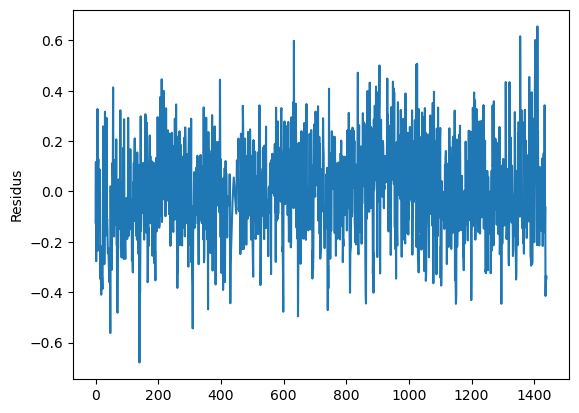

El p-valor per al test de normalitat dels residus del model lineal és: 0.8921597927748085


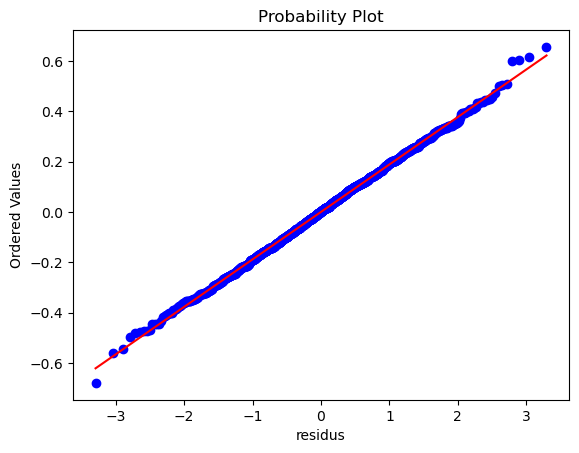

In [40]:
# Determinem el coeficient de determinació R^2:
print('R2={}'.format(model.score(X, y)))
# El model només explica el 17% de la variança de les dades.
# Comprobem que els residus compleixin una distribució normal i raonablement suau:
prediction = model.predict(X)
residual = (y - prediction)
plt.plot(residual)
plt.ylabel('Residus')
plt.show()
fig = plt.subplot()
prob = stats.probplot(residual, dist=stats.norm, plot=fig)
plt.xlabel('residus')
norm = normaltest(residual)
print('El p-valor per al test de normalitat dels residus del model lineal és: {}'.format(norm.pvalue))

In [41]:
# Mirem les influències de cada atribut en el model de regressió
feature_names = ['year', 'rating', 'opinions', 'reviews'] 

# Obtenim els coeficients
coefficients = model.coef_

# Els imprimim
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

year: -0.03519837780902806
rating: 0.0012575843636659445
opinions: -0.000997723618125231
reviews: 0.001478735541205987


Un coeficient positiu significa que un augment del valor de la característica condueix a un augment de la predicció, mentre que un coeficient negatiu significa que un augment del valor de la característica condueix a una disminució de la predicció. 

Per exemple, el coeficient de la funció de rating és de 0.00126, vol dir que un augment d'1 en el valor de rating comporta un augment de 0.00126 en el preu normalitzat utilitzant Box-Cox. En canvi per l'any és invers, un augment d'un any implica una disminució del preu normalitzat de -0.033 unitats. 
Sorprèn veure que augmentar el nombre d'opinions baixi el preu al model, aparentment una contradicció tenint en compte el fet que els vins amb més opinions tenen millor valoració. Probablement es tracti d'una petita correció que el model fa de l'efecte del rating. Cal tenir en compte que hi ha una petita correlació entre rating, opinions i reviews que podria influïr en aquests paràmetres. Una altra explicació podria ser que la gent té tendència a puntuar i donar opinions als vins que consideren amb bona relació qualitat-preu. Un vi car generalment ja "se sap" que serà bo, en canvi un vi econòmic bo és interesant puntuar-lo bé si agrada.

Com que la transformació de Box-Cox no és lineal, cada valor del preu normalitzat porta a un canvi diferent del preu final amb els coeficients obtinguts. Per analitzar els resultats del model és útil transformar els resultats utilitzant la transformació de Box-Cox inversa:

In [42]:
xt, lmbda = stats.boxcox(data.price)
print('lambda={}'.format(lmbda))
def invert_box_cox_price(y, lmbda):
    if lmbda == 0:
        out = np.exp(y)
    else:
        out = (y*lmbda+1)**(1/lmbda)
    return out

lambda=-0.3911390184297924


In [43]:
# Creem unes dades de mostra per prediure el preu d'un vi mal valorat
new_data = pd.DataFrame({'year': 2022, 'rating': 3.5, 'opinions': 50, 'reviews': 100}, index=[0])

# Creem una predicció utilitzant el model
prediction = model.predict(new_data)[0]
preu = invert_box_cox_price(prediction, lmbda)
print(preu)

11.319218244296293


In [44]:
# Creem unes dades de mostra per prediure el preu d'un vi molt antic i ben valorat
new_data = pd.DataFrame({'year': 2014, 'rating': 4.8, 'opinions': 3, 'reviews': 5}, index=[0])

# Creem una predicció utilitzant el model
prediction = model.predict(new_data)[0]
preu = invert_box_cox_price(prediction, lmbda)
print(preu)

19.498819498968597


Observem que la predicció de preus s'assembla al que podríem esperar. Un vi jove, amb una puntuació fluixeta de 3,5, obté un preu predit de 11,32€, mentre que un vi vell de 2014 amb una alta puntuació de 4.8 i pocs reviews té un preu predit de 19.50€.

# Resolució del problema

Hem estudiat l'efecte de diferents camps, categòrics i numerics, en el preu dels vins de la base de dades.

Pel que fa a les variables categòriques, hem vist que el fet que el vi sigui ecològic no té un efecte significatiu en el preu. A més, hem estudiat l'efecte del tipus de vi i hem vist que els vins negres son els més cars, tot i que no tenen una diferència significativa de preu amb els blancs. En canvi, els vins rosats son els més barats. Sorprenentment, realitzant un test T comparant els preus dels vins que estan d'oferta amb els que no, hem vist que els vins en oferta son més barats que els que no.

Comparant els preus de les 10 varietats de raïm més comunes al conjunt de dades utilitzant el test de Kruskal, hem vist que els vins que contenen varietats de raïm utilitzades per fer vins negres tendeixen a ser més cars que els vins utilitzats per a fer vins blancs o rosats, d'acord amb l'anàlisi anterior del preu en funció del tipus de vi.

Pel que fa a països, veiem que el preu dels vins espanyols és significativament més baix que el dels francesos, italians i alemanys. Això pot ser degut al fet que es tracta d'una web de vins espanyols que només afegeix vins estrangers quan son de millor qualitat, o simplement perque la producció en aquests paisos és més car que a Espanya.

Del darrer apartat on hem estudiat la regressió de la variable 'price' en funció de les variables contínues any, rating, opinions i reviews, podem dir que hi ha certs paràmetres que influencien el preu final del vi, però que la relació no és forta (el model explica menys del 20% de la variança). Sí que veiem que si el vi és més vell, el preu augmenta (cosa lògica degut a l'envelliment del vi en bota) i veiem una lleguera tendència a que una millor 'review' en revistes especialitzades fa augmentar el preu.

Però les correlacions són molt dèbils i, per tant, podem concloure que el preu d'un vi depèn segurament molt més fortament d'altres factors no contemplats en l'ajustament lineal, ja sigui les variables categòriques descrites anteriorment o altres paràmetres no inclosos a la web de vinissiumus.com, com per exemple el procés d'elaboració, el procés d'embotellatge i la llei de demanda i oferta.

Una altra observació pel que fa al comportament dels usuaris de la web de viníssimus és que els vins que son menys bons no tenen reviews. Això fa que només hi hagi reviews dels vins amb molt bones valoracions. 

En resum: El preu dels vins depèn del tipus de vi sent negres els més cars seguits de blancs i rosats; de si està d'oferta, cosa que el fa més barat i de la varietat de vi que conté. Pel que fa a les variables contínues, veiem que l'antiguitat del vi n'encareix el preu i un millor review en revistes especialitzades també fa pujar el preu.
